# Hydration and Fatigue Trends in Cycling Data

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://raw.githubusercontent.com/redbackoperations/Projects/main/Sports%20Performance%20Analysis/frontend/Cycling%20Analysis/data/extended_activities.csv'
df = pd.read_csv(url)

# Preview data
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (345, 49)


,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


**Explore Fatigue Indicators**

Summary Statistics & Missing Data

In [2]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])

# Summary statistics
df.describe()[['Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort']]


Missing values:
 Perceived Exertion           344
Perceived Relative Effort    344
Prefer Perceived Exertion    343
Total Steps                  337
Athlete Weight               275
Activity Gear                183
Bike Weight                  183
Grade Adjusted Distance      182
Average Temperature          161
Total Work                   148
Dirt Distance                 89
Average Elapsed Speed         89
Elevation Low                  7
Elevation High                 7
Elevation Loss                 7
Elevation Gain                 1
dtype: int64


,Elapsed Time,Distance,Max Heart Rate,Relative Effort
count,345.000000,345.000000,345.000000,345.000000
mean,5979.898551,34.531594,160.881159,90.675362
std,3386.451360,29.416878,20.664550,96.468992
min,1506.000000,4.060000,118.000000,5.000000
25%,3646.000000,12.150000,142.000000,25.000000
50%,5583.000000,24.280000,160.000000,51.000000
75%,7338.000000,52.230000,178.000000,127.000000
max,22391.000000,180.080000,210.000000,528.000000


Visualise Relationships (Fatigue Trends)

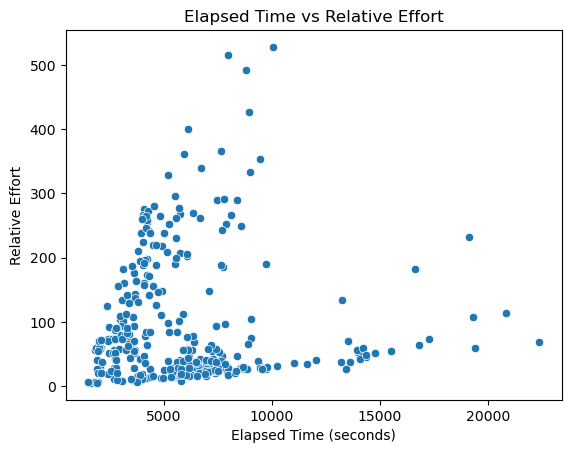

In [3]:
# Elapsed Time vs Relative Effort
sns.scatterplot(data=df, x='Elapsed Time', y='Relative Effort')
plt.title("Elapsed Time vs Relative Effort")
plt.xlabel("Elapsed Time (seconds)")
plt.ylabel("Relative Effort")
plt.show()


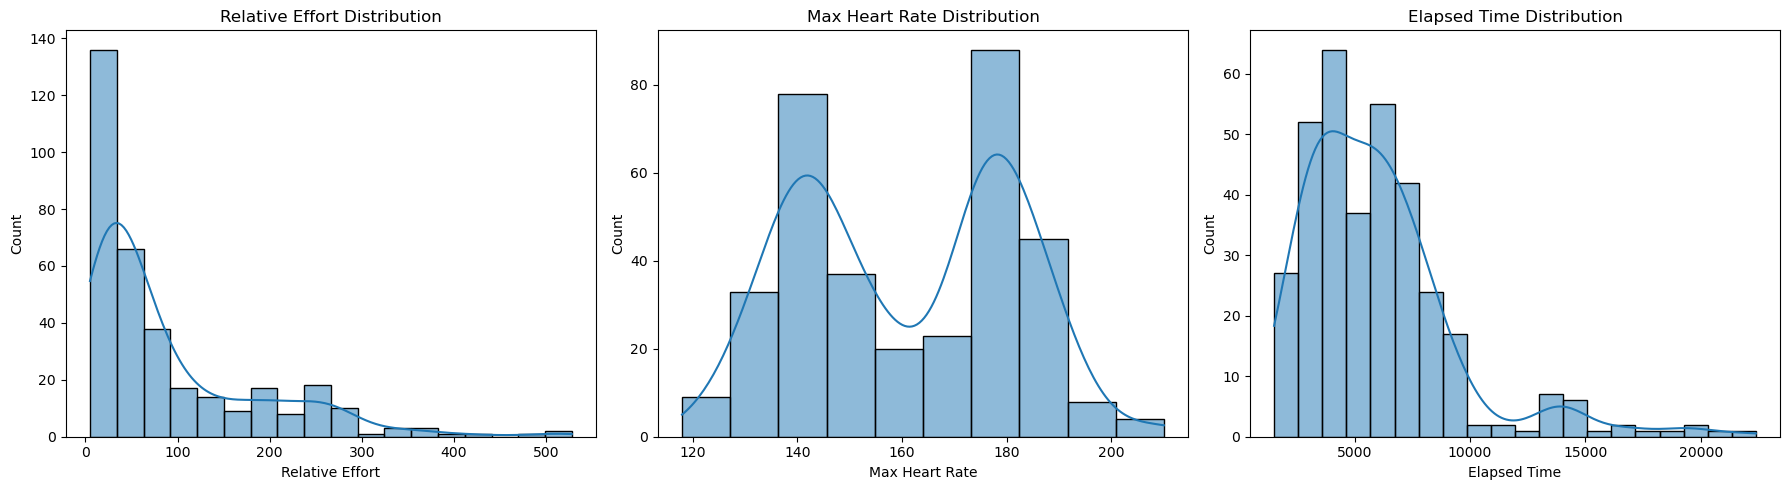

In [4]:
# Distribution plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Relative Effort'], kde=True, ax=axs[0])
axs[0].set_title("Relative Effort Distribution")

sns.histplot(df['Max Heart Rate'], kde=True, ax=axs[1])
axs[1].set_title("Max Heart Rate Distribution")

sns.histplot(df['Elapsed Time'], kde=True, ax=axs[2])
axs[2].set_title("Elapsed Time Distribution")

plt.tight_layout()
plt.show()


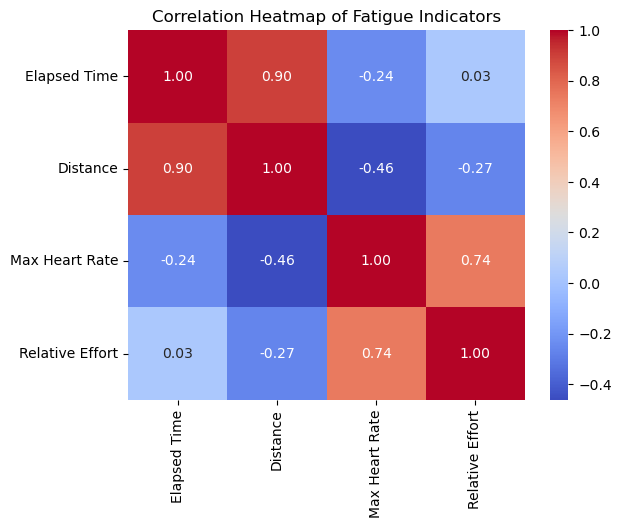

In [5]:
# Correlation matrix
features_of_interest = ['Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort']
corr_matrix = df[features_of_interest].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Fatigue Indicators")
plt.show()


**Identify Fatigue Trends & Insights**

Trend Analysis over Time

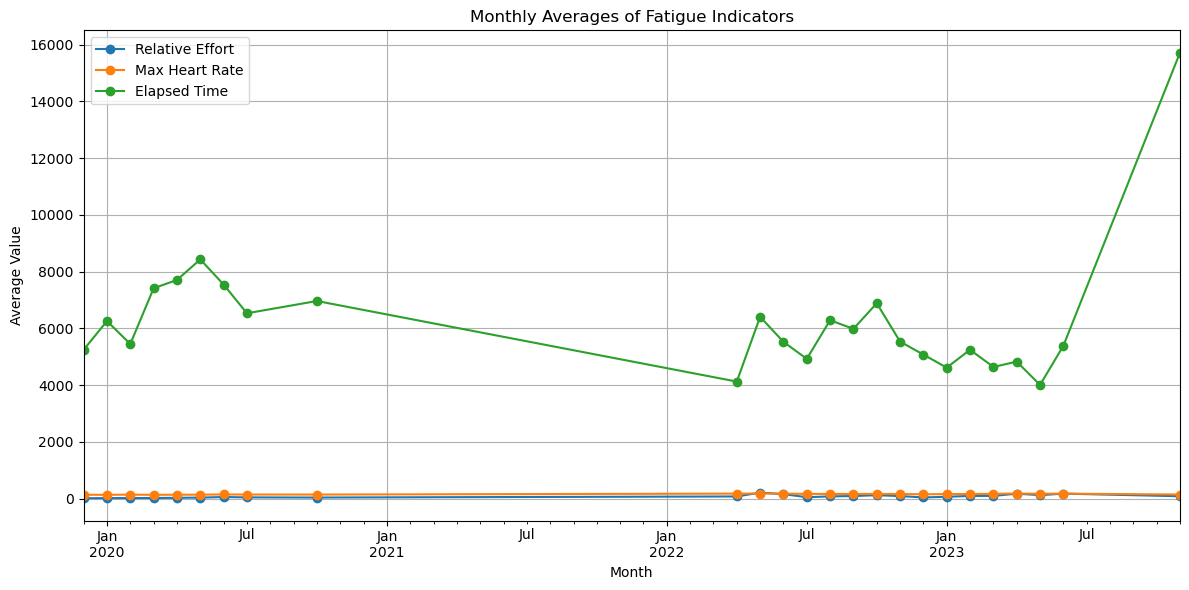

In [6]:
# Convert Activity Date to datetime
df['Activity Date'] = pd.to_datetime(df['Activity Date'], errors='coerce')

# Extract month-year
df['Month'] = df['Activity Date'].dt.to_period('M')

# Group by month and calculate averages
monthly_avg = df.groupby('Month')[['Relative Effort', 'Max Heart Rate', 'Elapsed Time']].mean()

# Plot
monthly_avg.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Averages of Fatigue Indicators")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.grid()
plt.tight_layout()
plt.show()


Compare High vs Low Effort Sessions

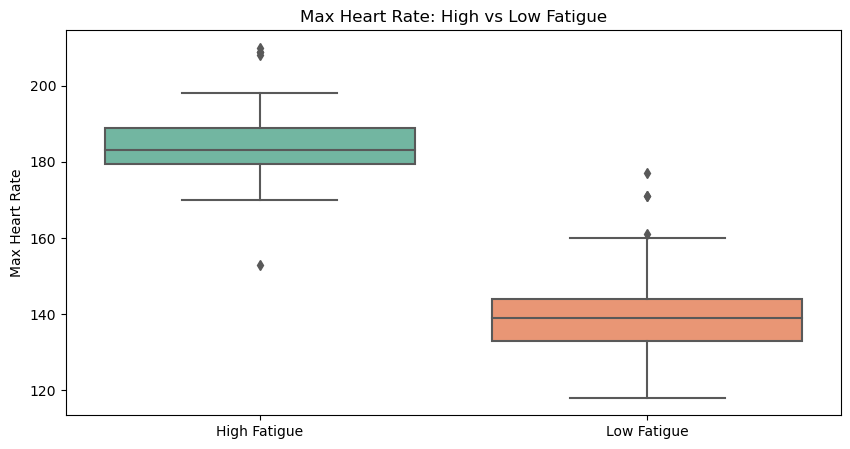

In [7]:
high_fatigue = df[df['Relative Effort'] >= df['Relative Effort'].quantile(0.75)]
low_fatigue = df[df['Relative Effort'] <= df['Relative Effort'].quantile(0.25)]

# Boxplots for comparison
plt.figure(figsize=(10,5))
sns.boxplot(data=[high_fatigue['Max Heart Rate'], low_fatigue['Max Heart Rate']], palette='Set2')
plt.xticks([0,1], ['High Fatigue', 'Low Fatigue'])
plt.title("Max Heart Rate: High vs Low Fatigue")
plt.ylabel("Max Heart Rate")
plt.show()


**Hydration Analysis**

Check if columns exist

In [8]:
hydration_cols = ['Average Temperature', 'Total Work', 'Perceived Exertion', 
                  'Perceived Relative Effort', 'Sweat Loss']  # unlikely but we'll check

existing_hydration_cols = [col for col in hydration_cols if col in df.columns]
print("Hydration-related columns found in dataset:", existing_hydration_cols)


Hydration-related columns found in dataset: ['Average Temperature', 'Total Work', 'Perceived Exertion', 'Perceived Relative Effort']


Check for missing values in these columns

In [9]:
df[existing_hydration_cols].isnull().sum()


Average Temperature          161
Total Work                   148
Perceived Exertion           344
Perceived Relative Effort    344
dtype: int64

Summary statistics

In [10]:
df[existing_hydration_cols].describe()


,Average Temperature,Total Work,Perceived Exertion,Perceived Relative Effort
count,184.000000,1.970000e+02,1.0,1.0
mean,16.239130,1.088805e+06,9.0,104.0
std,5.391492,5.829653e+05,NaN,NaN
min,6.000000,1.498250e+05,9.0,104.0
25%,12.000000,6.565810e+05,9.0,104.0
50%,15.000000,1.029423e+06,9.0,104.0
75%,20.000000,1.283860e+06,9.0,104.0
max,33.000000,3.362215e+06,9.0,104.0


Visualize Distributions

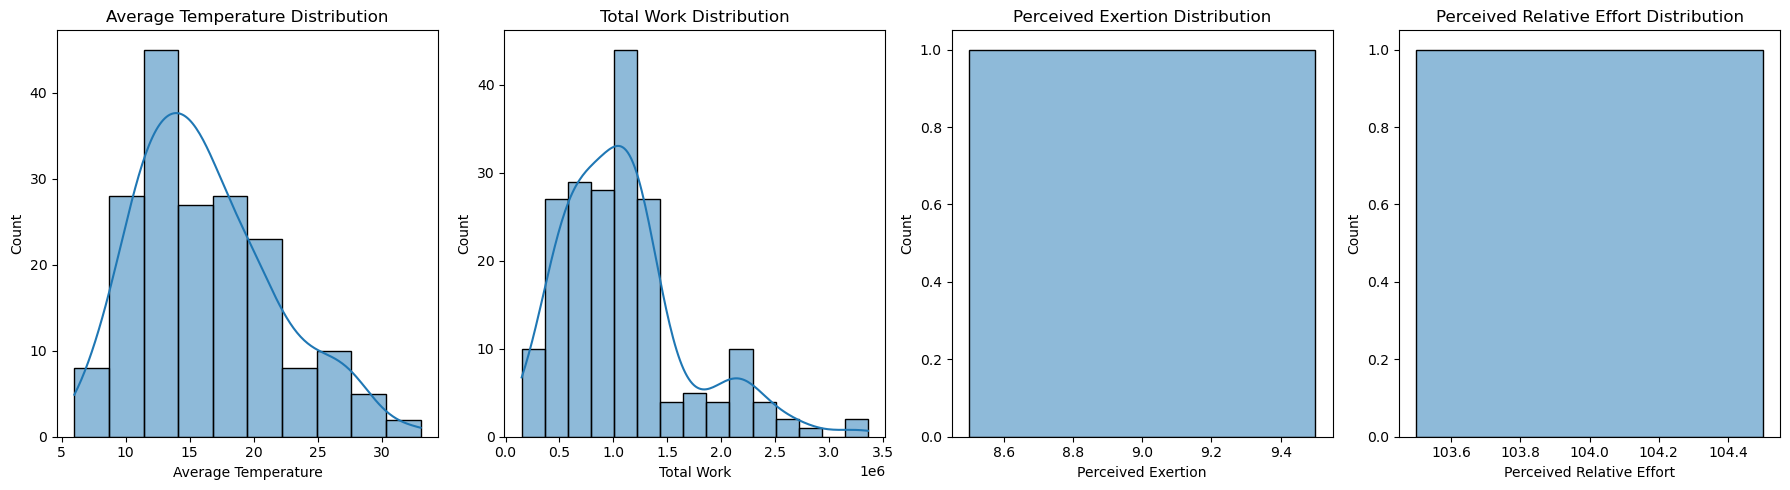

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))
for i, col in enumerate(existing_hydration_cols):
    plt.subplot(1, len(existing_hydration_cols), i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


Correlation with Fatigue

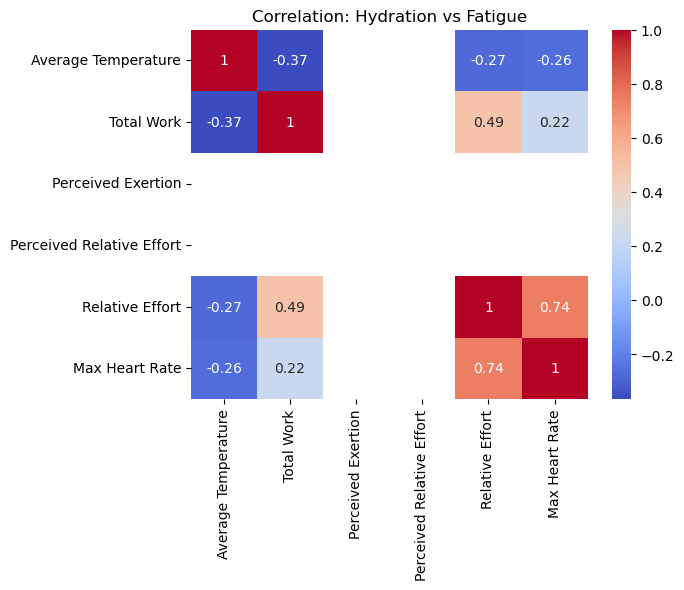

In [12]:
fatigue_related = ['Relative Effort', 'Max Heart Rate']
corr = df[existing_hydration_cols + fatigue_related].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation: Hydration vs Fatigue")
plt.show()


**Share Findings**

#### **Fatigue Analysis Summary**

**1. Missing Values**
- Significant missing values in fatigue-related features like `Perceived Exertion`, `Perceived Relative Effort`, and `Athlete Weight` (250+ rows).
- Core fatigue indicators (`Elapsed Time`, `Max Heart Rate`, `Relative Effort`) are complete.

**2. Fatigue Indicator Distribution**
- `Elapsed Time` and `Relative Effort` are right-skewed — many short rides with lower effort.
- `Max Heart Rate` is approximately normally distributed with multiple peaks.

**3. Correlation Insights**
- `Distance` and `Elapsed Time` are strongly correlated (**0.90**).
- `Relative Effort` has a moderate positive correlation with `Max Heart Rate` (**0.74**).
- Weak correlation between `Relative Effort` and `Elapsed Time`.

**4. Trend Analysis Over Time**
- Monthly averages show:
  - Stable trends in `Max Heart Rate`.
  - Fluctuating `Relative Effort`.
  - Sharp increase in `Elapsed Time` around late 2023 — could indicate outliers or endurance events.

**5. High vs Low Fatigue Comparison**
- High Fatigue sessions exhibit significantly higher `Max Heart Rate`.
- Suggests potential threshold: High fatigue likely reflects intense cardiovascular effort.

---

#### **Hydration Indicator Exploration**

**1. Hydration-Related Features Found**
- `Average Temperature`, `Total Work`, `Perceived Exertion`, `Perceived Relative Effort` were found.
- `Sweat Loss` not available in the dataset.

**2. Missing Values**
- `Average Temperature`: 159 missing  
- `Total Work`: 146 missing  
- `Perceived Relative Effort`: 342 missing  
- `Perceived Exertion`: No missing values, but all values are `9` (no variance)

**3. Distribution Insights**
- `Average Temperature`: Normal-like distribution  
- `Total Work`: Right-skewed with possible outliers  
- `Perceived Exertion` and `Perceived Relative Effort`: No useful distribution due to constant values

**4. Correlation with Fatigue Indicators**
- `Total Work` shows moderate correlation:
  - With `Relative Effort` (**0.49**)
  - With `Max Heart Rate` (**0.22**)
- `Average Temperature` shows weak negative correlation with both fatigue indicators (~ -0.26 to -0.27)

**5. Next Step**
- Drop `Perceived Exertion` and `Perceived Relative Effort` due to lack of variability
- Clean or impute missing values in `Average Temperature` and `Total Work`
- Redo hydration correlation analysis after cleanup

In [13]:
# Drop constant columns
df.drop(columns=['Perceived Exertion', 'Perceived Relative Effort'], inplace=True)

# Impute missing values with median
for col in ['Average Temperature', 'Total Work']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("Cleaned! Missing values:")
print(df[['Average Temperature', 'Total Work']].isnull().sum())


Cleaned! Missing values:
Average Temperature    0
Total Work             0
dtype: int64


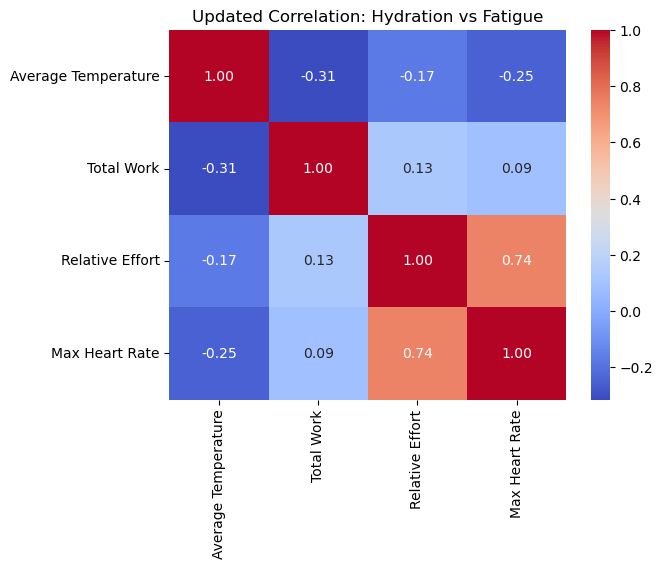

In [14]:
# Updated hydration columns
hydration_cleaned = ['Average Temperature', 'Total Work']
fatigue_related = ['Relative Effort', 'Max Heart Rate']

# Recompute correlation
updated_corr = df[hydration_cleaned + fatigue_related].corr()

# Plot heatmap
sns.heatmap(updated_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Correlation: Hydration vs Fatigue")
plt.show()


Summary after clean up: Hydration correlation analysis

- Conducted trend and fatigue analysis on cycling data
- Explored hydration indicators and handled missing values
- Dropped constant columns for clean correlation
- Visualized insights via heatmaps and distributions
